## Table of Contents
- [1.라이브러리 불러오기](#ch.1)
- [2.데이터 설명 및 확인](#ch.2)
- [3.데이터 전처리](#ch
- [4.분석을 위한 주제선정](#ch.4)
- [5.독립표본 t 검정](#ch.5).3)

## 1.라이브러리 및 데이터 불러오기 <a class='anchor' id='ch.1'></a>
- pandas
- numpy
- matplotlib
- seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [3]:
import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

In [4]:
train_data=pd.read_csv('playground-series-s4e1/train.csv')
test_data=pd.read_csv('playground-series-s4e1/test.csv')
sample_submission=pd.read_csv('playground-series-s4e1/sample_submission.csv')

## 2.데이터 설명 및 확인<a class='anchor' id='ch.2'></a>

- Customer ID: 각 고객의 고유 식별자
- Surname: 고객의 성 이름
- Credit Score: 고객의 신용점수
- Geography: 고객이 거주하는 국가
- Gender: 고객의 성별
- Age: 고객의 나이
- Tenure: 고객이 은행을 이용한 연수
- Balance: 고객의 계좌 잔액
- NumOfProducts: 고객이 이용하는 은행 상품 수(ex. 예금 계좌, 신용카드)
- HasCrCard: 신용카드 보유 여부
- IsActiveMember: 활성 회원 여부
- EstimatedSalary: 예상 고객 급여
- Exited: 이탈된 고객 여부

In [5]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [7]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [8]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,110023.0,2.200450e+05,31761.048671,165034.00,1.925395e+05,220045.00,2.475505e+05,275056.00
CustomerId,110023.0,1.569210e+07,71684.990992,15565701.00,1.563286e+07,15690175.00,1.575693e+07,15815690.00
CreditScore,110023.0,6.565308e+02,80.315415,350.00,5.970000e+02,660.00,7.100000e+02,850.00
Age,110023.0,3.812221e+01,8.861550,18.00,3.200000e+01,37.00,4.200000e+01,92.00
Tenure,110023.0,4.996637e+00,2.806148,0.00,3.000000e+00,5.00,7.000000e+00,10.00
Balance,110023.0,5.533361e+04,62788.519675,0.00,0.000000e+00,0.00,1.201456e+05,250898.09
NumOfProducts,110023.0,1.553321e+00,0.544714,1.00,1.000000e+00,2.00,2.000000e+00,4.00
HasCrCard,110023.0,7.530425e-01,0.431244,0.00,1.000000e+00,1.00,1.000000e+00,1.00
IsActiveMember,110023.0,4.952328e-01,0.499980,0.00,0.000000e+00,0.00,1.000000e+00,1.00
EstimatedSalary,110023.0,1.123151e+05,50277.048244,11.58,7.444033e+04,117832.23,1.546314e+05,199992.48


## 3.데이터 전처리<a class='anchor' id='ch.3'></a>

- 데이터의 결측치, 이상치들을 확인하고 제거 또는 수정하여 데이터의 신뢰도를 올리는 작업
- 데이터의 단위나 스케일 표준화
- 시각화, 머신러닝 등의 작업에서 결측치로 인한 오류방지
- 머신러닝 작업에서의 범주형 데이형 데이터 처리 등

### 3.1. 결측치 확인

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


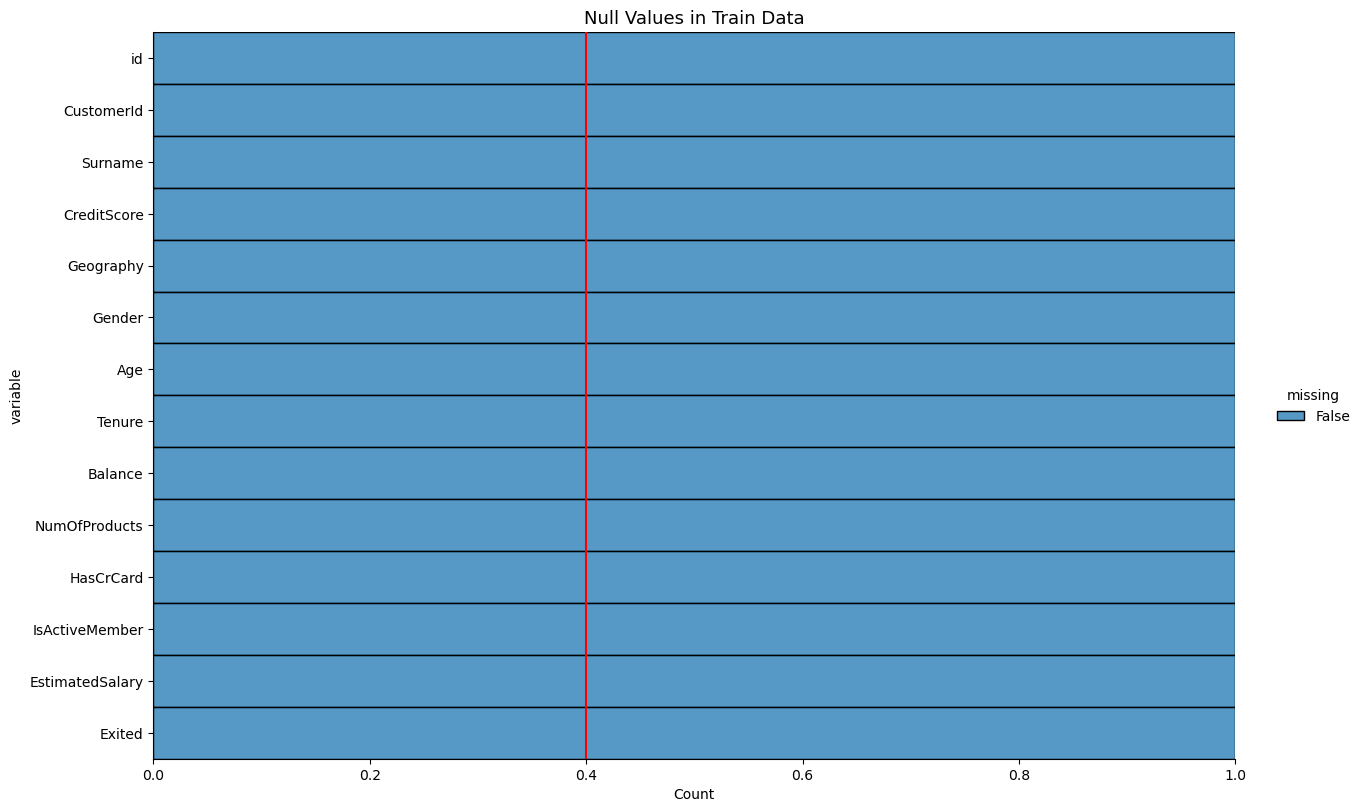

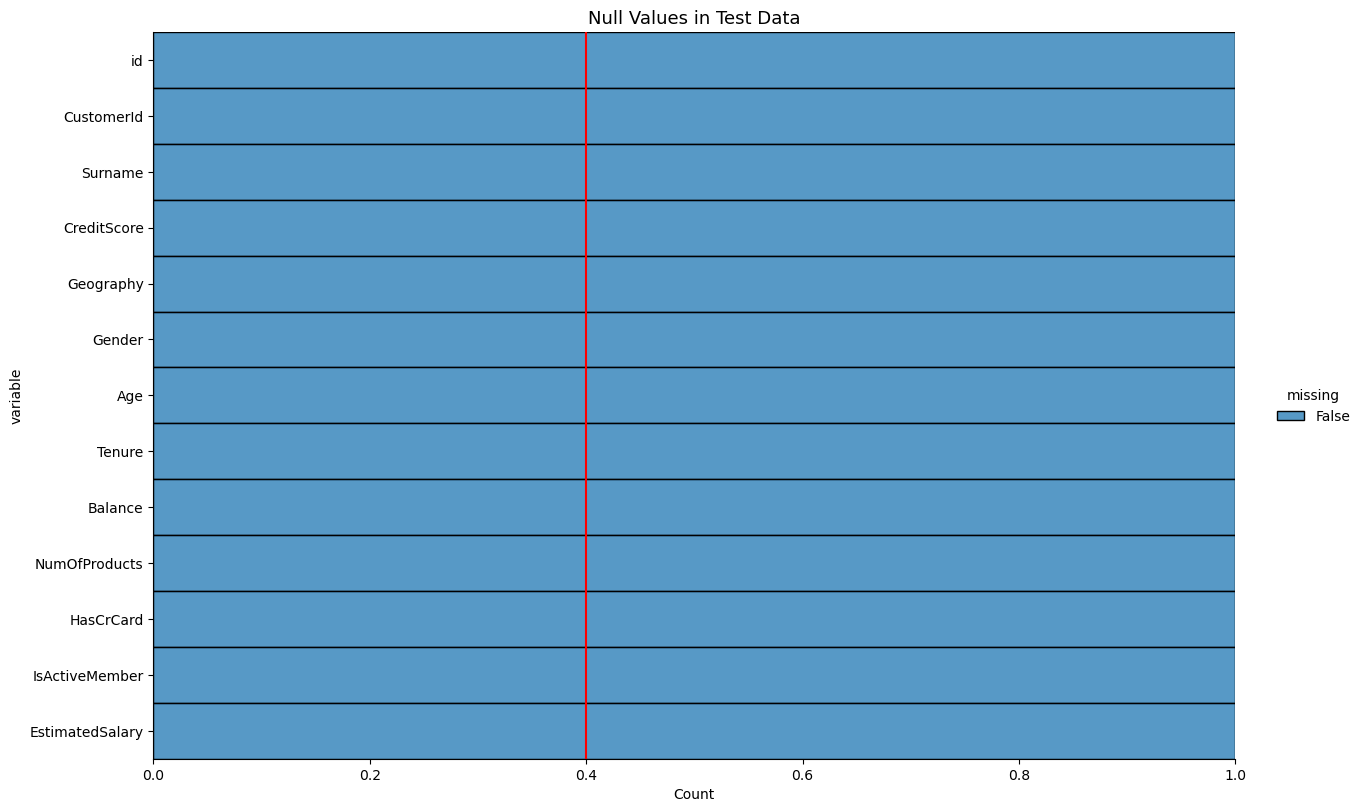

In [11]:
sns.displot(data=train_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.6
)

plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()

sns.displot(data=test_data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.6
)

plt.axvline(0.4, color='r')
plt.title('Null Values in Test Data', fontsize=13)
plt.show()

결측치는 확인되지 않음

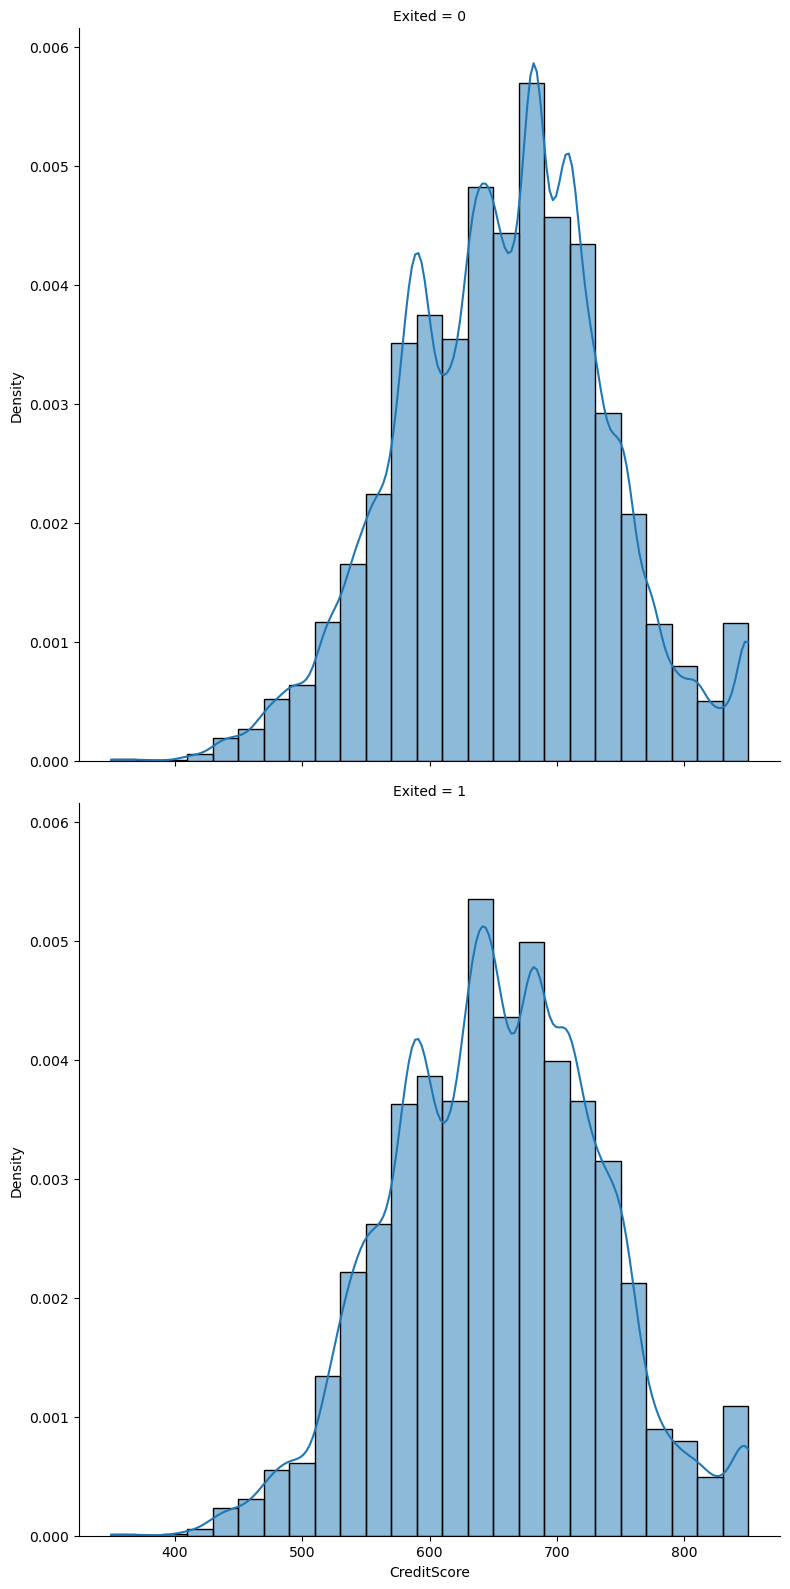

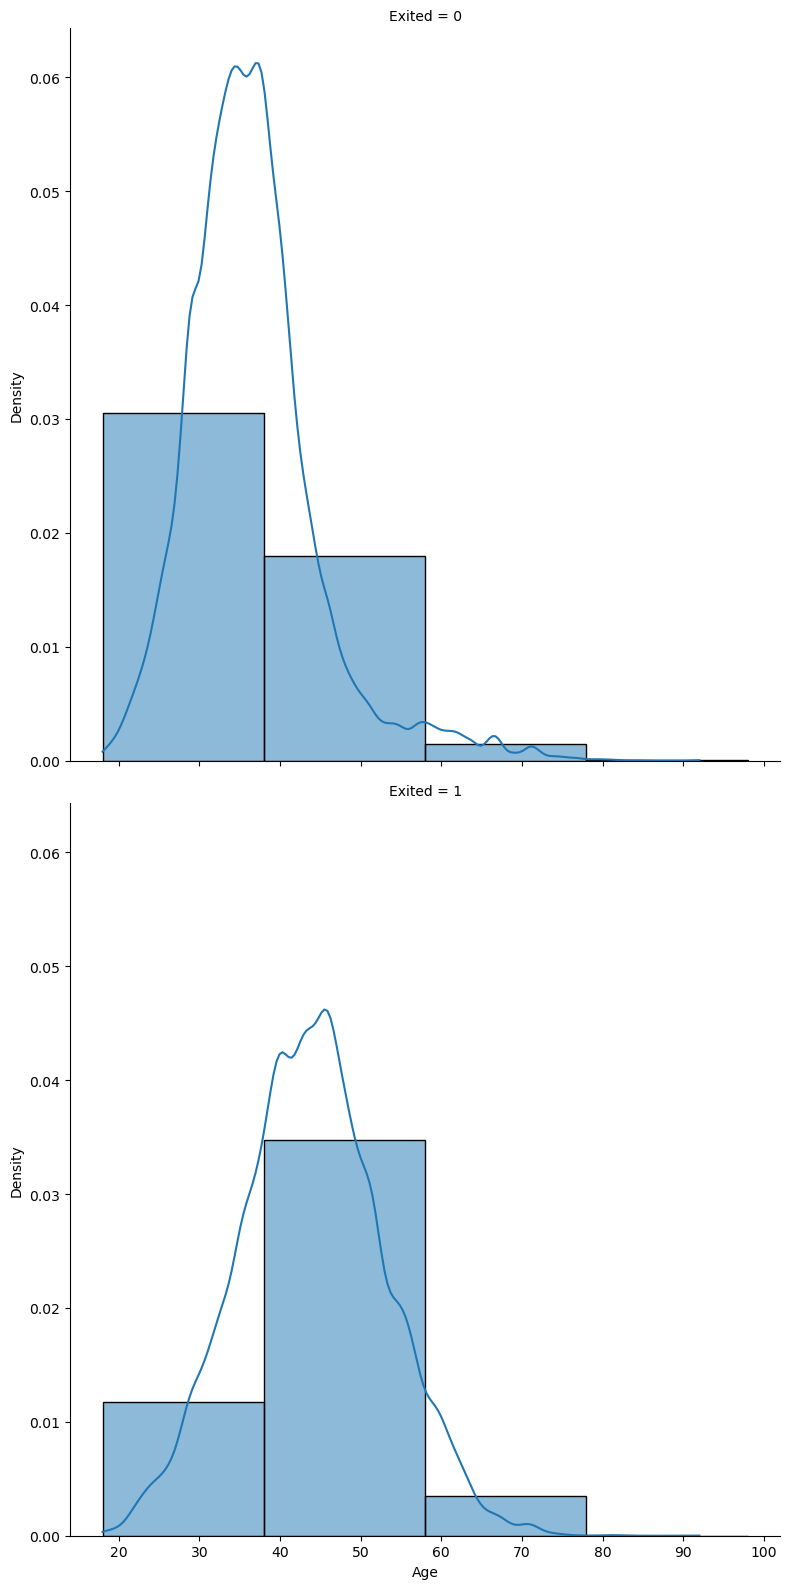

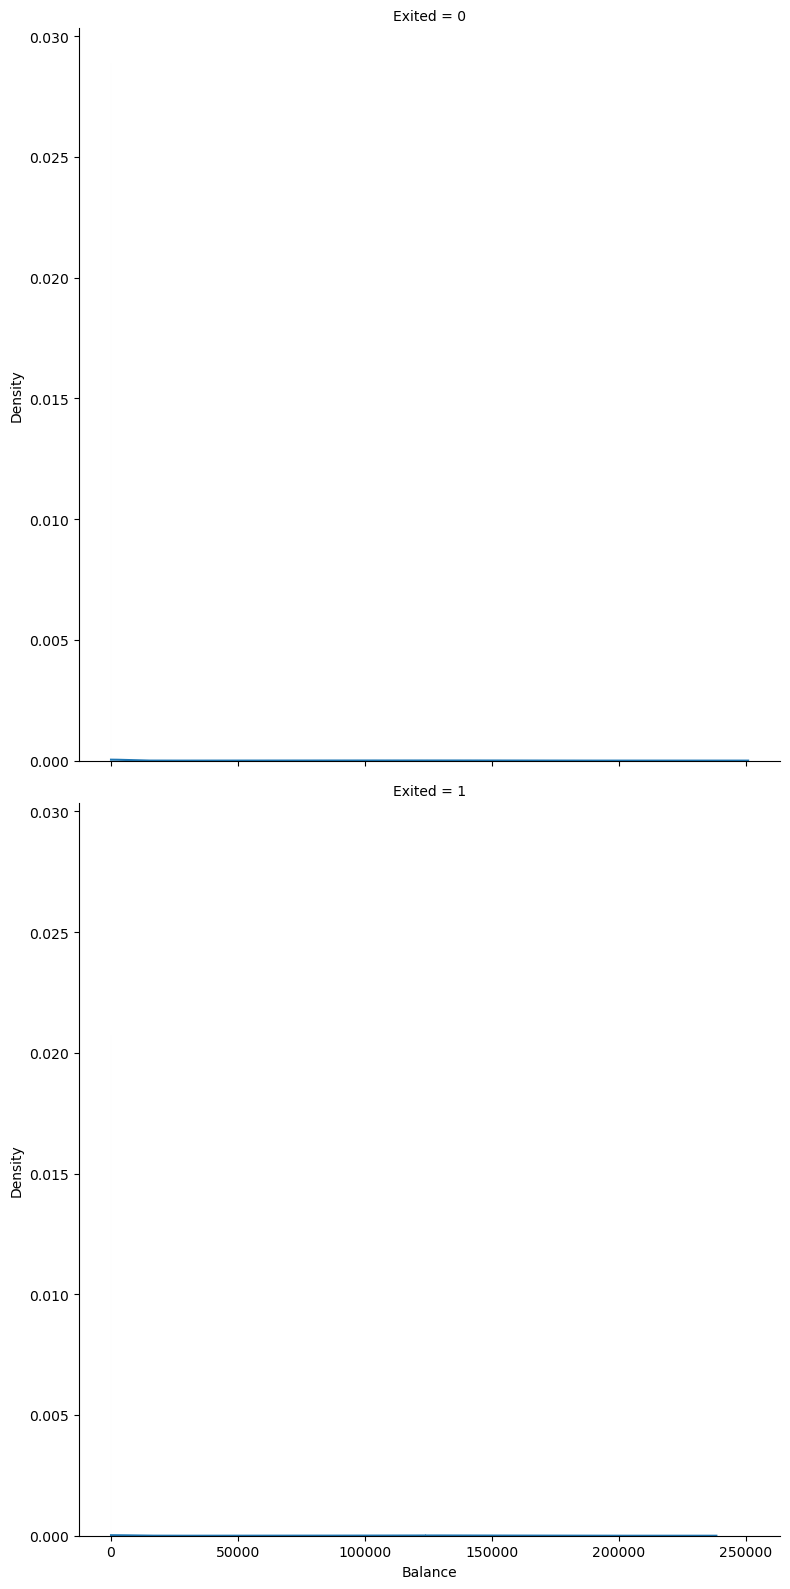

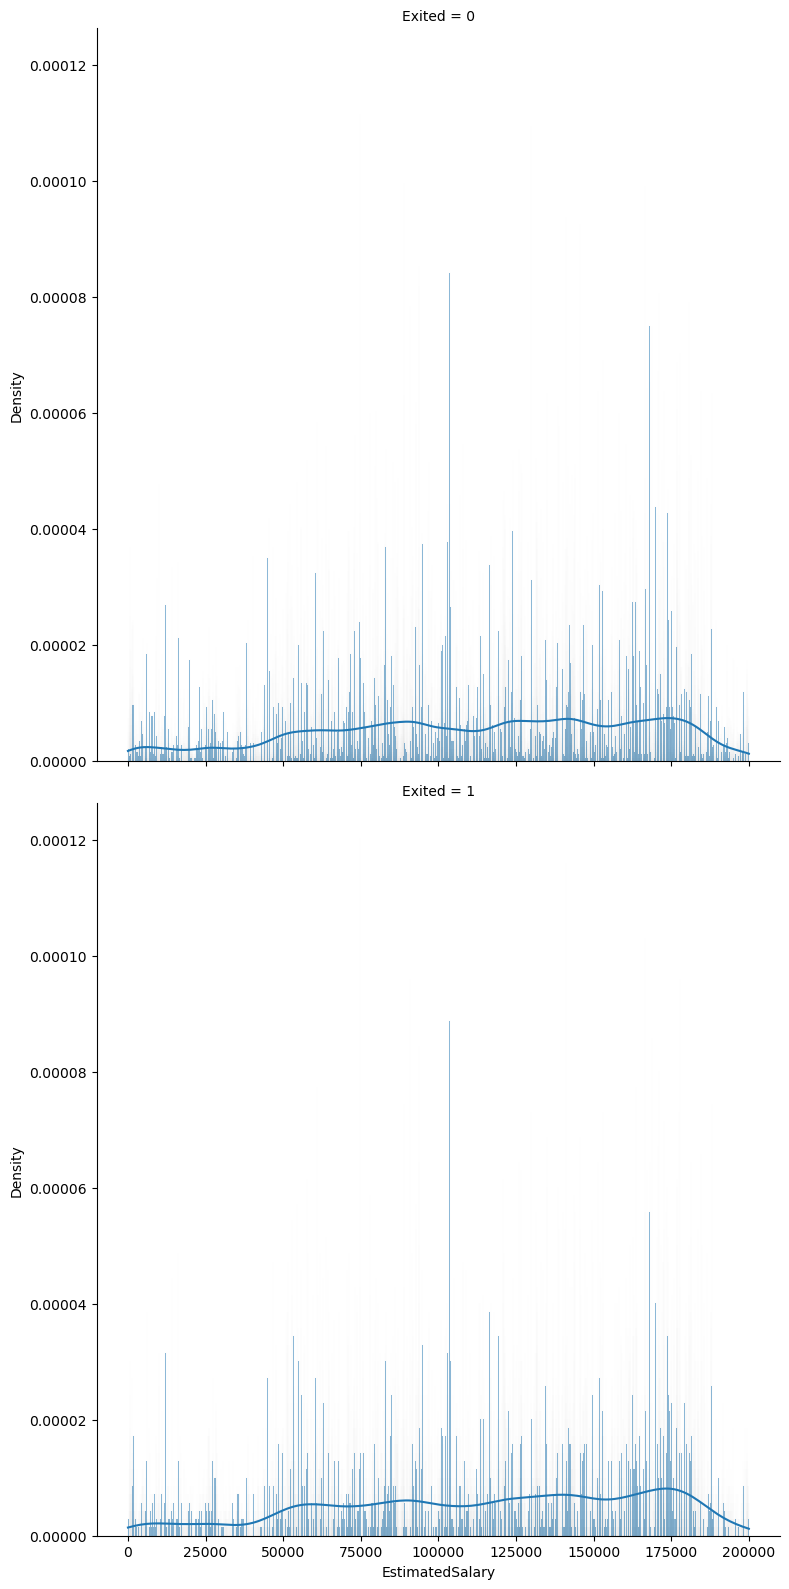

In [12]:
continuos_vars=train_data[['CreditScore','Age','Balance','EstimatedSalary']]

for col in continuos_vars:
    b=sns.FacetGrid(row='Exited',data=train_data,height=8)
    b.map(sns.histplot,col,binwidth=20,kde=True,stat='density')

In [13]:
categorical_vars=train_data[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]

In [14]:
for col in categorical_vars:
    print(categorical_vars[col].unique())

['France' 'Spain' 'Germany']
['Male' 'Female']
[ 3  1 10  2  5  4  8  6  9  7  0]
[2 1 3 4]
[1. 0.]
[0. 1.]


### 3.2. 변수 분석

#### 3.2.1. 타겟 변수 분석

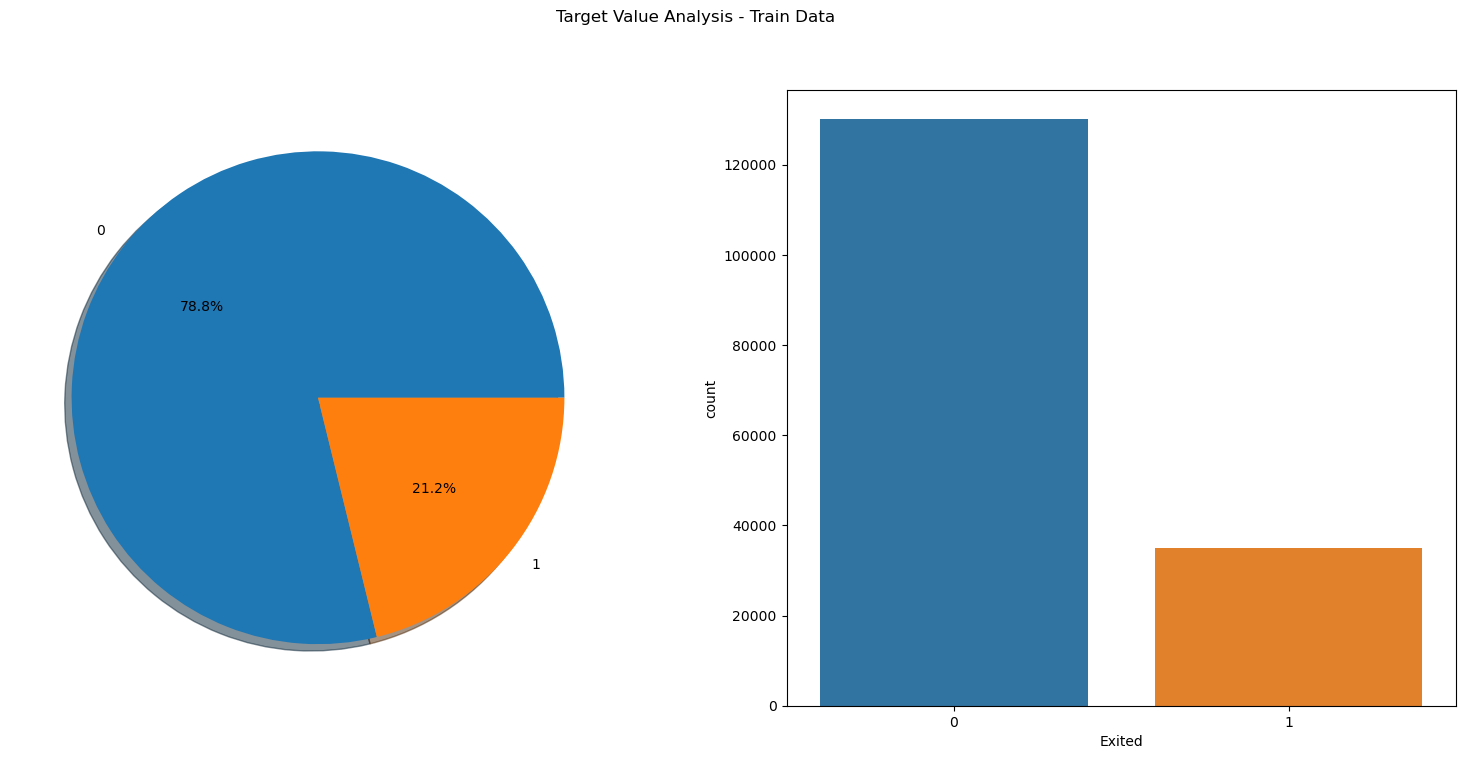

In [15]:
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(19,8))
train_data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=train_data,ax=ax[1])
plt.suptitle('Target Value Analysis - Train Data')
plt.show()

Exited는 고객의 이탈 여부를 나타낸 것으로 0은 이탈하지 않음, 1은 이탈됨으로 표시된다. 데이터 상으로 0은 약 80%, 1은 약 20%로 데이터의 심한 불균형이 보인다.

#### 3.2.2. 범주형 변수 분석

범주형 데이터가 존재하는 컬럼:

- Geography
- Gender
- Tenure
- NumOfProducts
- HasCrCard
- IsActiveMember

In [16]:
categorical_vars=train_data[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]

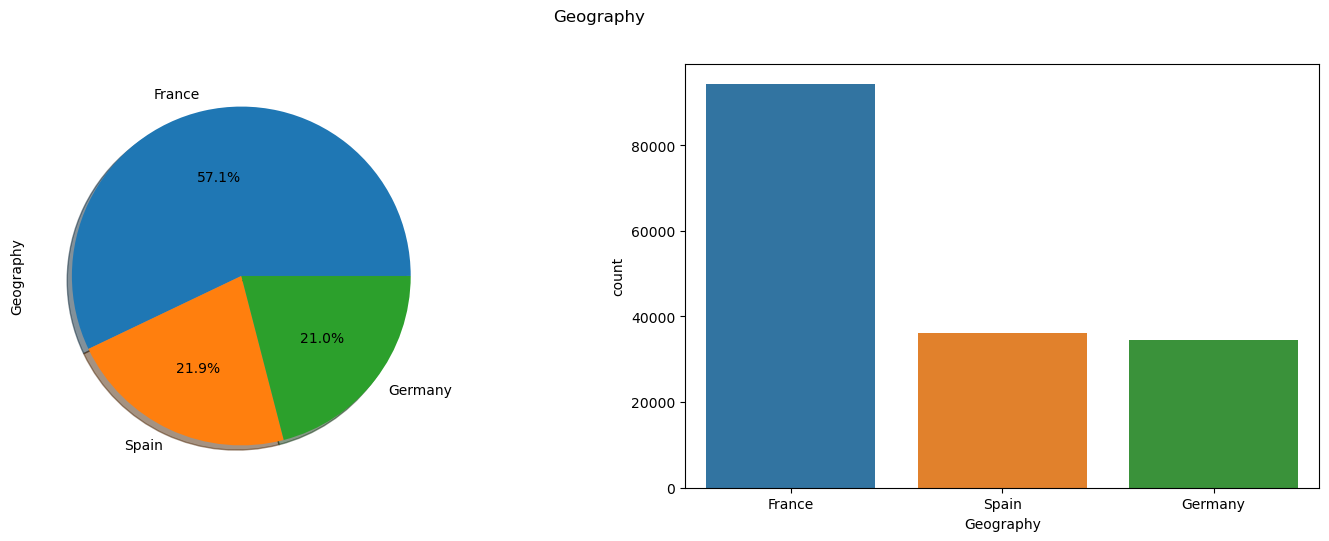

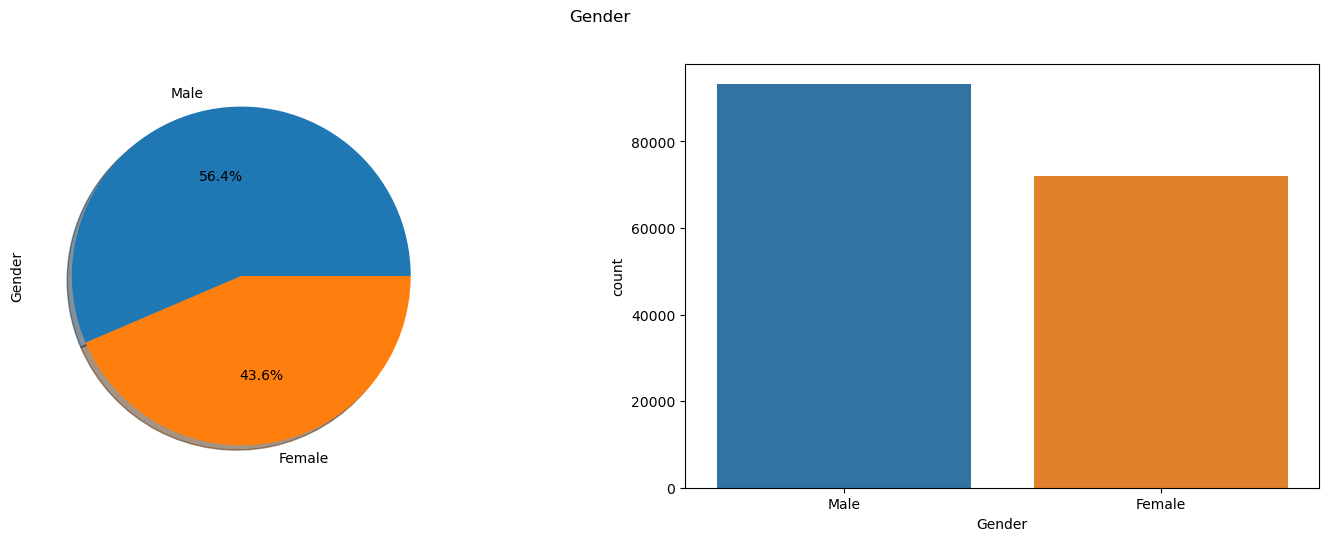

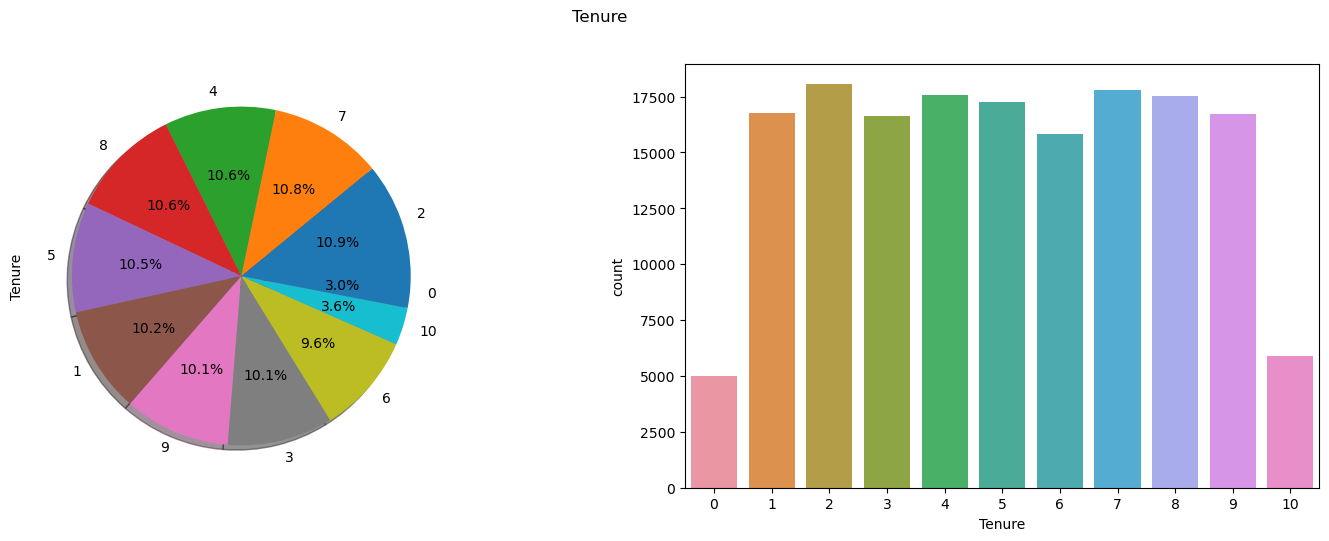

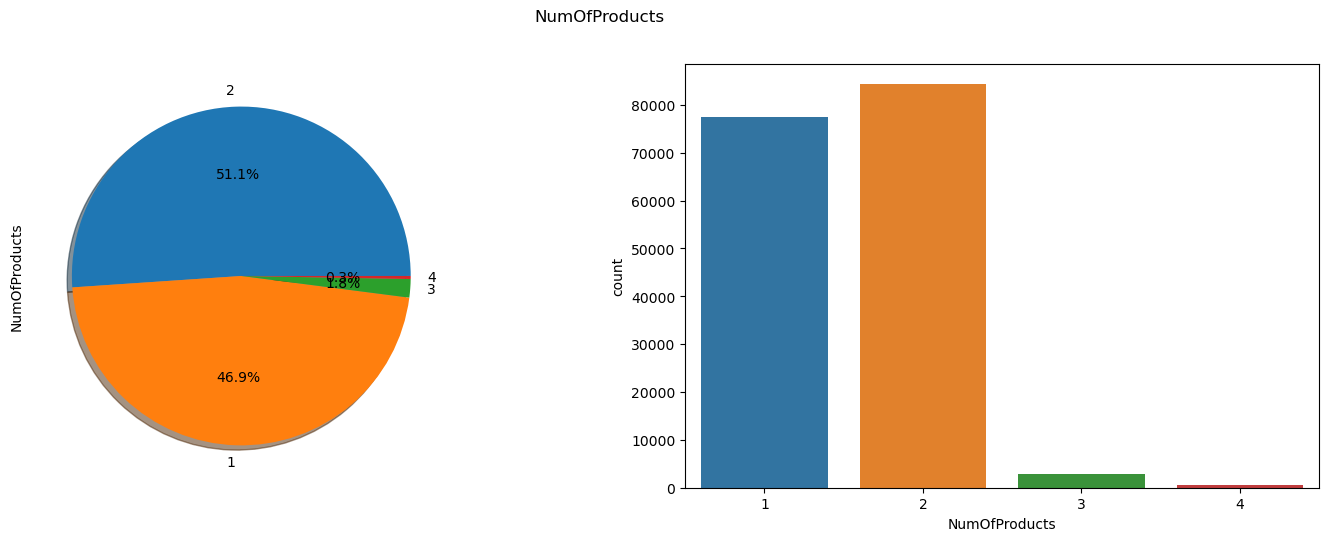

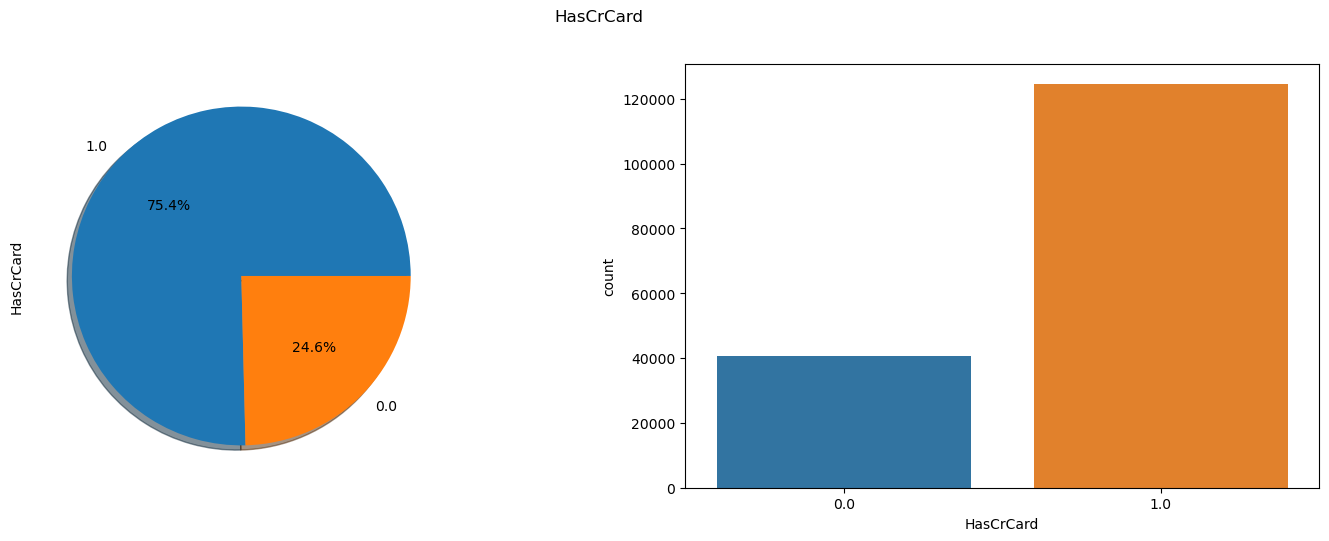

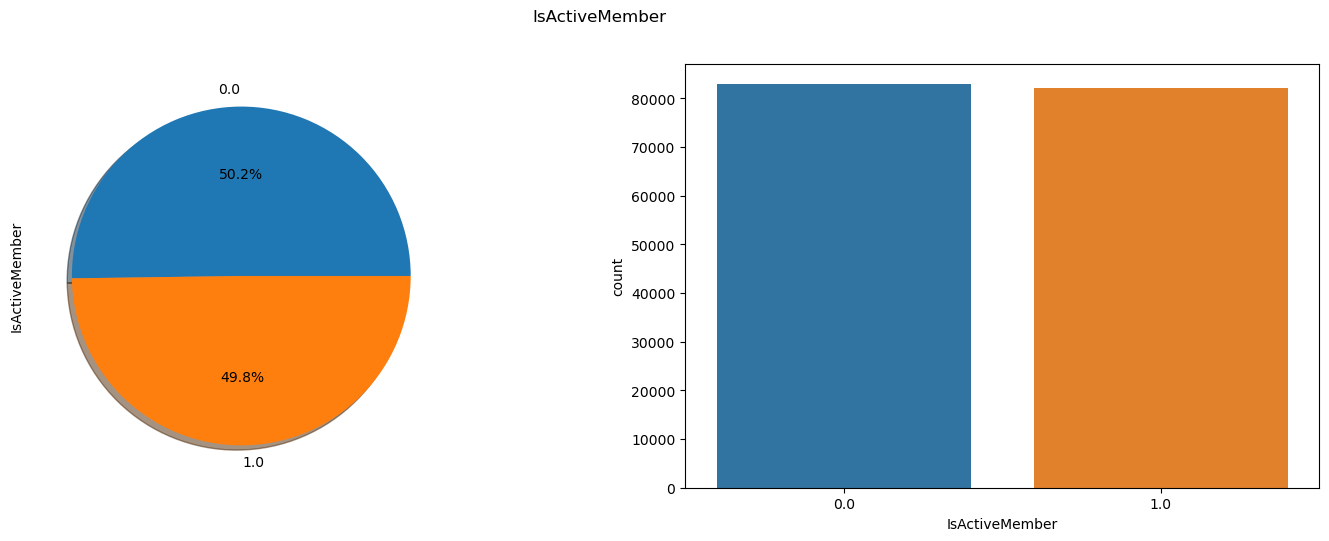

In [17]:

for col in categorical_vars:
    fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(18,5.5))
    train_data[col].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{col}')
    sns.countplot(x=col,data=train_data,ax=ax[1])
    plt.suptitle(f'{col}')
    plt.show()

#### 3.2.3. 연속형 데이터 분석

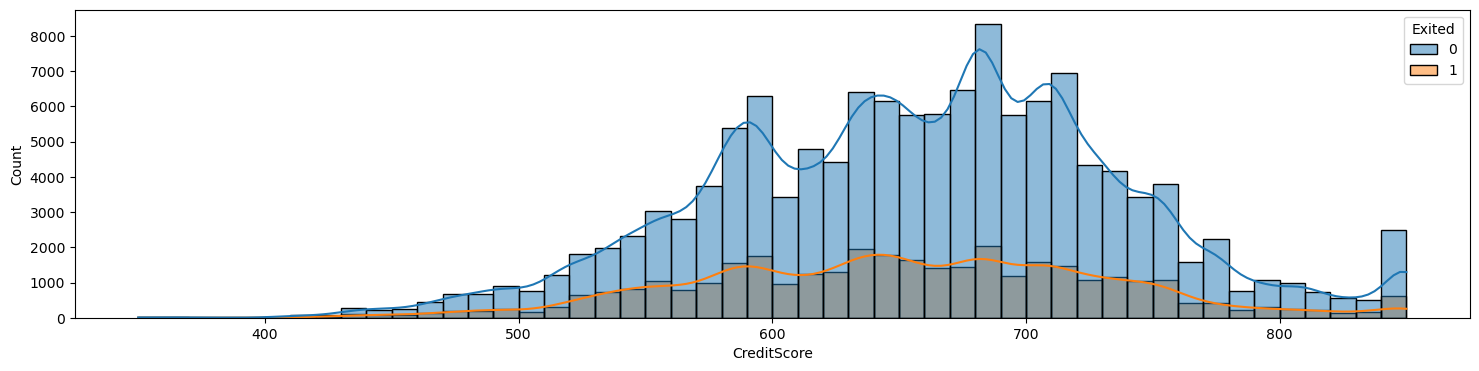

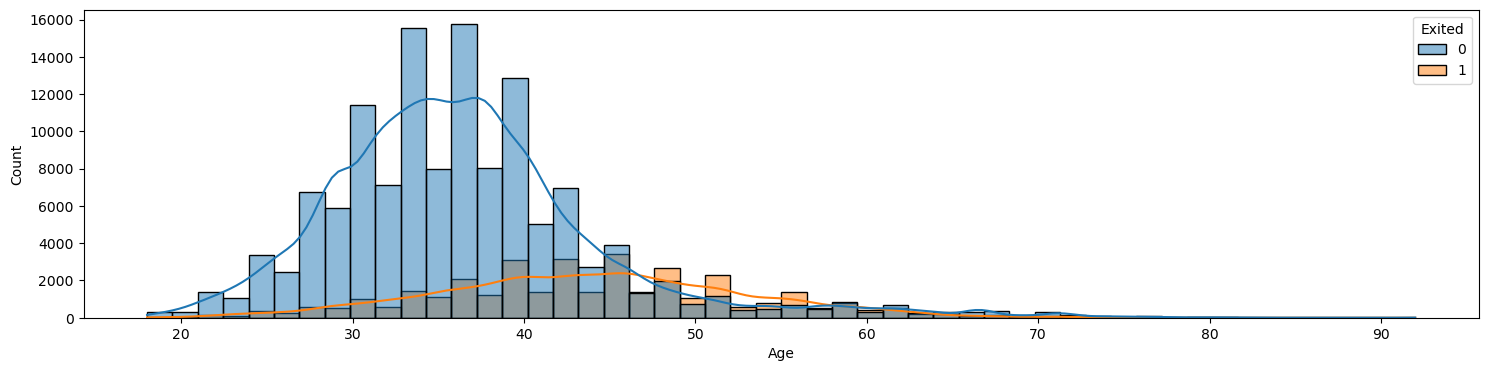

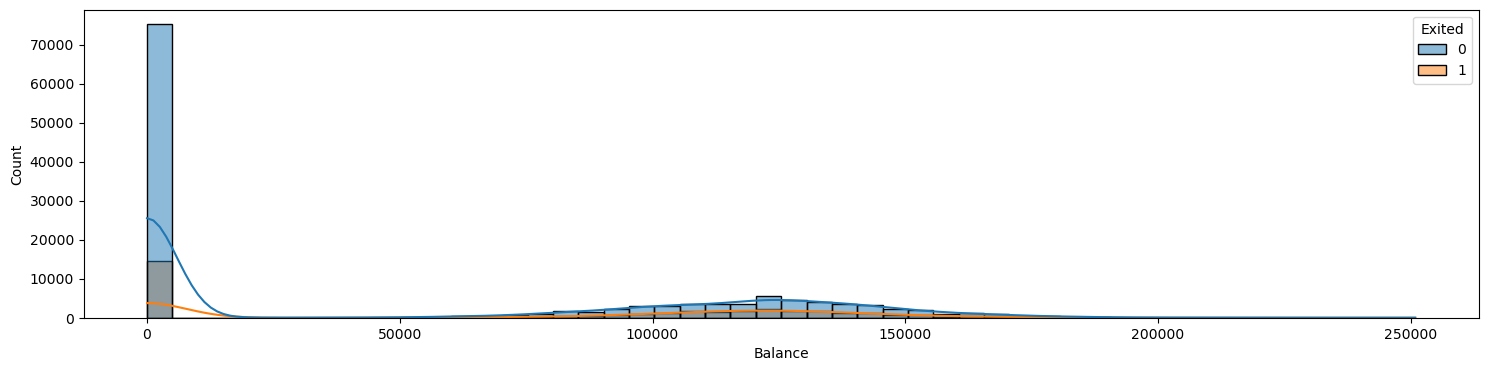

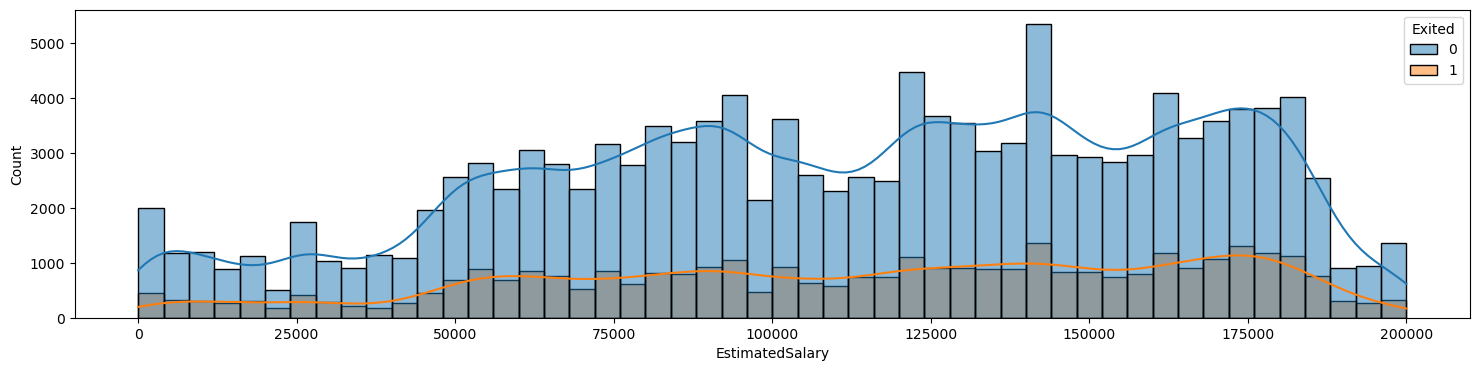

In [18]:
for column in continuos_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=train_data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

## 4.분석을 위한 주제 선정

- x에 따른 y

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


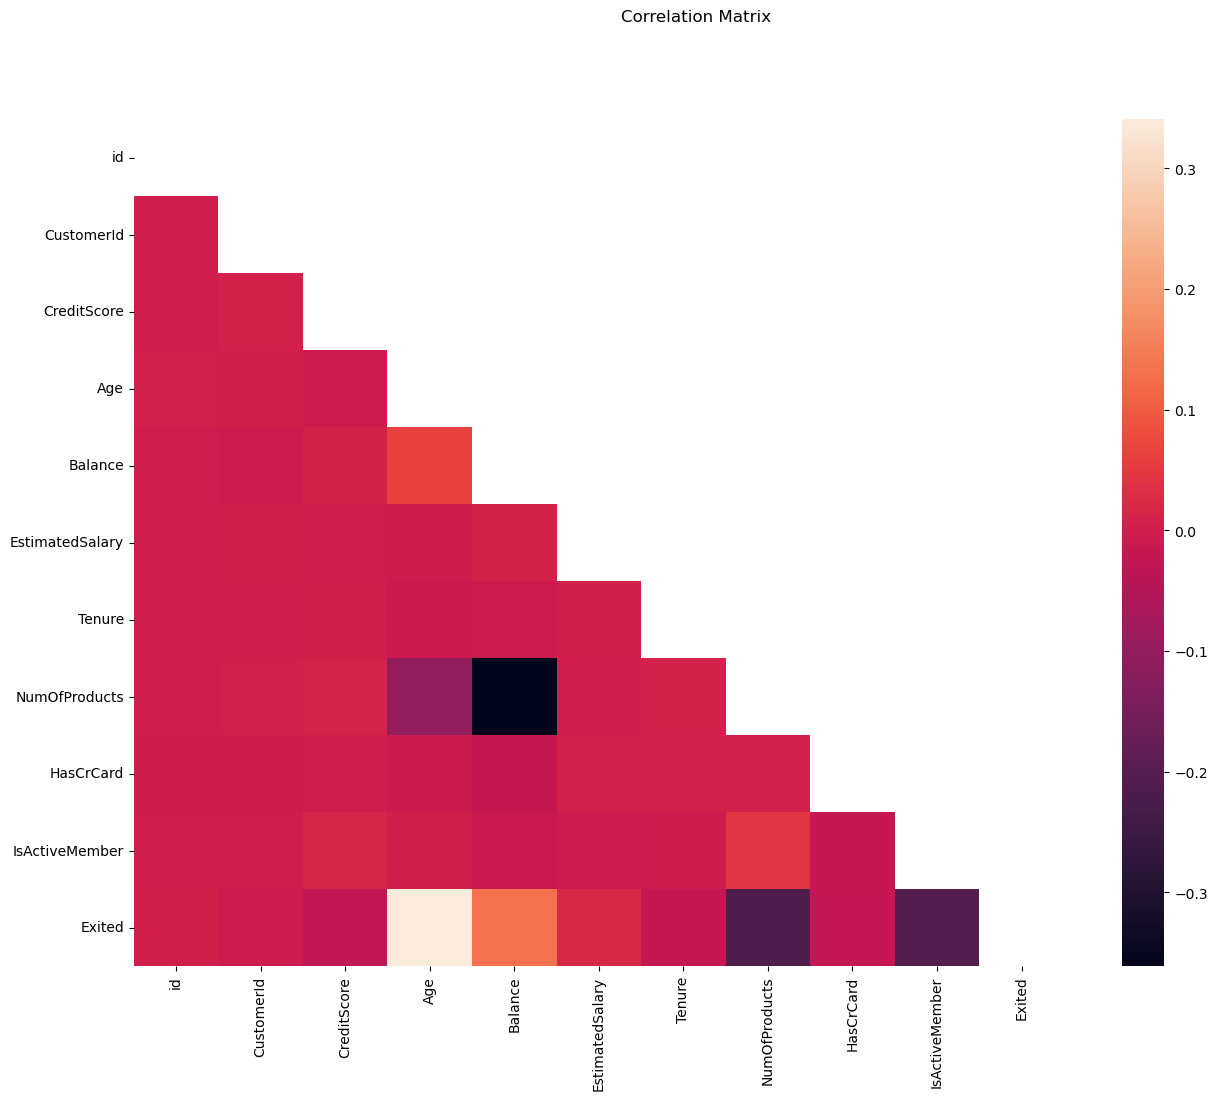

In [20]:
df4 = train_data[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

## 5.독립표본 t 검정
- 독립 변수:CreditScore,Age,Tenure,Balance
- 종속 변수:Exited

- 표본의 크기가 크기 때문에 중심극한정리에 의해 정규성을 띈다고 가정
- Exited 컬럼의 값이 0,1인 두 집단에서 CreditScore의 차이 검정을 실시
- 검정을 위해서 2Sample t-test를 이용
- Balance의 값이 0인게 많이 존재하여 0값은 제외함.
- 가설설정
    + H0:Exited 그룹간의 독립변수에 대한 평균차이는 없다.
    + H1:Exited 그룹간의 독립변수에 대한 평균차이는 있다.


### 5.1.2Sample t-test

In [21]:
nonzero=train_data[train_data['Balance']!=0].reset_index(drop=True)

In [22]:
df_0=nonzero.loc[nonzero['Exited']==0,['CreditScore','Age','Tenure','Balance']].reset_index()
df_1=nonzero.loc[nonzero['Exited']==1,['CreditScore','Age','Tenure','Balance']].reset_index()

#### 5.1.1.CreditScore t-test

In [23]:
t, p=stats.ttest_ind(df_0.CreditScore,df_1.CreditScore)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.
0.0


#### 5.1.2.Age t-test

In [24]:
t, p=stats.ttest_ind(df_0.Age,df_1.Age)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.
0.0


#### 5.1.3Tenure t-test

In [25]:
t, p=stats.ttest_ind(df_0.Tenure,df_1.Tenure)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.
0.0


#### 5.1.4.Balance t-test

In [26]:
t, p=stats.ttest_ind(df_0.Balance,df_1.Balance)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.
0.06745


### 5.2. 50대 심층분석 t-test
- 가장 높은 이탈률을 보이는 50대를 대상으로 심층분석실행.
- 50대를 대상으로 Exited별로 그룹을 나누어 t-test 실시
- 검정을 위해 t-test 이용
- 가설설정
  + H0:Exited 그룹간의 독립변수에 대한 평균차이는 없다.
  + H1:Exited 그룹간의 독립변수에 대한 평균차이는 있다.


In [27]:
def categorize_age(age):
    if age<20:
        return '10s'
    elif age<30:
        return '20s'
    elif age<40:
        return '30s'
    elif age<50:
        return '40s'
    elif age<60:
        return '50s'
    elif age<70:
        return '60s'
    else:
        return '70+'

In [28]:
train_data['Age_range']=train_data['Age'].apply(categorize_age)

In [30]:
nonzero=train_data[train_data['Balance']!=0].reset_index(drop=True)

In [31]:
df_0_50s=nonzero.loc[(nonzero['Exited']==0)&(nonzero['Age_range']=='50s'),['CreditScore','Tenure','Balance']].reset_index(drop=True)
df_1_50s=nonzero.loc[(nonzero['Exited']==1)&(nonzero['Age_range']=='50s'),['CreditScore','Tenure','Balance']].reset_index(drop=True)

#### 5.2.1.CreditScore t-test

In [32]:
t, p=stats.ttest_ind(df_0_50s.CreditScore,df_1_50s.CreditScore)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.
0.4056


#### 5.2.2.Tenure t-test

In [33]:
t, p=stats.ttest_ind(df_0_50s.Tenure,df_1_50s.Tenure)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.
0.06549


#### 5.2.3.Balance t-test

In [35]:
t, p=stats.ttest_ind(df_0_50s.Balance,df_1_50s.Balance)
t, p

if p < 0.05:
    print("H0 기각: 두 샘플 간에는 통계적으로 유의한 차이가 있습니다.")
else:
    print("H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.")
    
print(round(p,5))

H0 채택: 두 샘플 간에는 통계적으로 유의한 차이가 없습니다.
0.30545


### 5.3.결론

전체적으로 보았을 때  Balance를 제외한 CreditScore, Age, Tenure에 대해서 통계적으로 유의미한 차이가 존재했다. 그러나 가장 높은 이탈률을 보이는 50대를 대상으로 심층 분석한 결과 50대에 한해서는 CreditScore, Tenure, Balance는 유의미한 차이가 존재하지 않으므로 50대의 이탈 여부를 결정하는 것은 다른 변수에 있을 확률이 크다.

In [41]:
df_0_50s.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,2395.0,655.778706,83.982610,365.00,598.00,659.00,711.00,850.00
Tenure,2395.0,4.989562,2.848495,0.00,3.00,5.00,8.00,10.00
Balance,2395.0,121800.337336,26249.424723,3768.69,104348.25,121611.22,137942.17,238387.56


In [43]:
df_1_50s.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,4387.0,654.055391,80.198223,350.00,594.000,652.0,710.00,850.00
Tenure,4387.0,4.856850,2.828431,0.00,2.000,5.0,7.00,10.00
Balance,4387.0,122428.909907,22906.838686,40685.92,108127.065,122314.5,136526.03,238387.56


In [58]:
train_data.loc[(train_data['Age_range']=='40s')&(train_data['Exited']==1),].count()

id                 15075
CustomerId         15075
Surname            15075
CreditScore        15075
Geography          15075
Gender             15075
Age                15075
Tenure             15075
Balance            15075
NumOfProducts      15075
HasCrCard          15075
IsActiveMember     15075
EstimatedSalary    15075
Exited             15075
Age_range          15075
dtype: int64

In [59]:
np.__version__

'1.26.2'

In [60]:
pd.__version__

'2.1.4'

In [64]:
sns.__version__

'0.12.2'

In [73]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import sklearn

In [71]:
MinMaxScaler.__version__

AttributeError: type object 'MinMaxScaler' has no attribute '__version__'

In [74]:
sklearn.__version__

'1.3.2'

In [75]:
import scipy

In [76]:
scipy.__version__

'1.11.4'

In [77]:
import matplotlib

In [78]:
matplotlib.__version__

'3.8.0'

In [79]:
import statsmodels

In [80]:
statsmodels.__version__

'0.14.0'